## CPE 4903 - Cats and Dogs ##

## HW Part I - Import data ##
Produce the labeled data matrices X and Y by reading all 25000 images in the "train" folder. 
* You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats. 
* Download train.zip and unzip the 25000 files and move them to a folder and note the file path. For example, mine was
  C:\Users\haiho\Dropbox\_Professor\ECE\_fall 2020\CPE4903\Animals\train 
* You can use the functions provided in this notebook
* hint: You can use following loop command to loop through all the files: "for i,image_file in enumerate(images) :"
* Use train_test_split (with randomization) to split the data between train and test at 80/20. Be vigilant and verify the dimensions of X,Y throughout
* Display the resulting data matrices that should look like the following:
    - Shape of X_train is: (12288, 20000)
    - Shape of X_test is: (12288, 5000)
    - Shape of Y_train is: (1, 20000)
    - Shape of Y_test is: (1, 5000)
* Display the first 5 values of X_train and Y_train

In [1]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
import time
 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#Make sure do not have words "cat" or "dog" in path name
TRAIN_DIR = r'C:\Users\Riddi\Desktop\CPE4903Work\animals\train\train'  
ROWS = 64
COLS = 64
CHANNELS = 3

In [3]:
os.listdir(TRAIN_DIR)[0:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [4]:
train_images = [TRAIN_DIR+'\\'+i for i in os.listdir(TRAIN_DIR)]
train_images[0:2]

['C:\\Users\\Riddi\\Desktop\\CPE4903Work\\animals\\train\\train\\cat.0.jpg',
 'C:\\Users\\Riddi\\Desktop\\CPE4903Work\\animals\\train\\train\\cat.1.jpg']

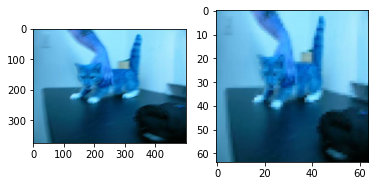

i =  0
C:\Users\Riddi\Desktop\CPE4903Work\animals\train\train\cat.0.jpg
Shape of resized image is (64, 64, 3)


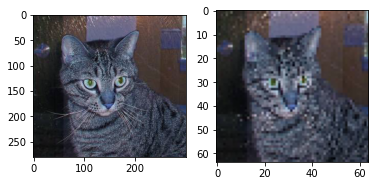

i =  1
C:\Users\Riddi\Desktop\CPE4903Work\animals\train\train\cat.1.jpg
Shape of resized image is (64, 64, 3)


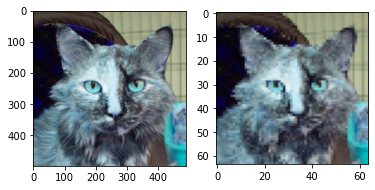

i =  2
C:\Users\Riddi\Desktop\CPE4903Work\animals\train\train\cat.10.jpg
Shape of resized image is (64, 64, 3)


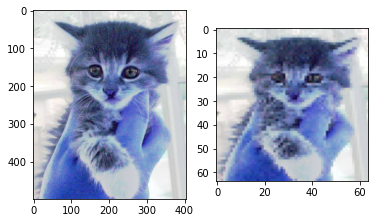

i =  3
C:\Users\Riddi\Desktop\CPE4903Work\animals\train\train\cat.100.jpg
Shape of resized image is (64, 64, 3)


In [5]:
for i,image_file in enumerate(train_images) :
    img = cv2.imread(image_file, cv2.IMREAD_COLOR)
    img_resized = cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(img_resized)
    plt.show()
    print('i = ', i)
    print(image_file)
    print('Shape of resized image is {}'. format(img_resized.shape))
    time.sleep(2)
    if i==3:
        break

In [6]:
img_resized.shape

(64, 64, 3)

In [7]:
# falttens matrix to vector rank 0 type
x = np.squeeze(img_resized.reshape((ROWS*COLS*CHANNELS,1)))
x.shape

(12288,)

In [8]:
print(image_file)
if 'cat' in image_file.lower() :
    print('cat, output = 1')        
else :
    print('dog, output = 0')

C:\Users\Riddi\Desktop\CPE4903Work\animals\train\train\cat.100.jpg
cat, output = 1


In [9]:
'dog' in image_file.lower()

False

In [10]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

In [11]:
# Your Part I code here. Print the shapes of all X's and Y's
# Your Part I code here. Print the shapes of all X's and Y's
m = len(train_images)
X = np.zeros((m,len(x)), dtype = np.uint8)
Y = np.zeros((1,m))
for i,image_file in enumerate(train_images) :
        image = read_image(image_file)
        X[i,:] = np.squeeze(image.reshape(len(x),1))
        if 'dog' in image_file.lower():
            Y[0, i] = 0
        elif 'cat' in image_file.lower():
            Y[0, i] = 1

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.T, test_size = 0.2, random_state=5)
m_train = len(Y_train)
m_test = len(Y_test)
X_train = X_train.T
Y_train = Y_train.T
Y_test = Y_test.T
X_test = X_test.T
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ",   X_test.shape)
print("Y_test shape: ", Y_test.shape)
print(Y)
print(Y.shape)

X_train shape:  (12288, 20000)
Y_train shape:  (1, 20000)
X_test shape:  (12288, 5000)
Y_test shape:  (1, 5000)
[[1. 1. 1. ... 0. 0. 0.]]
(1, 25000)


In [13]:
print(X_train[0:5])
print(Y_train[0,0:20])

[[  7 108 158 ... 101 194  51]
 [ 10 128 167 ... 103 174  68]
 [ 15 185 146 ... 161 217  71]
 [  9 110 157 ... 113 201  56]
 [ 12 127 166 ... 115 181  73]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]


In [14]:
np.savez_compressed('cats_and_dogs', X_train, X_test, Y_train, Y_test)

## HW Part II - Manual Binary Classification Algorithm ##
Use the equations below, which was implemented in your previous assignment of classifying the unit circle to implement the cat/dog classification using the data generated in part I. 
<div>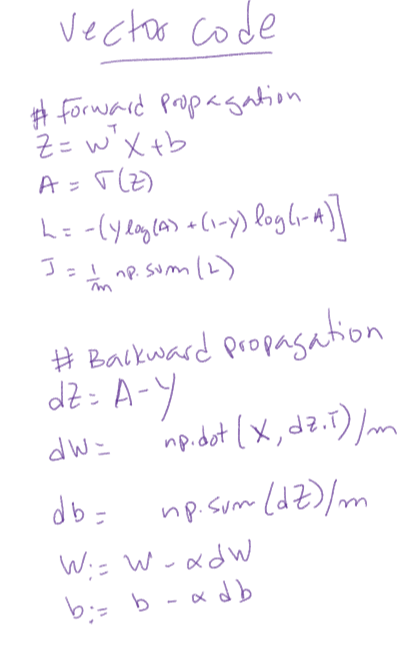<div>
    
Your successful run of the LoR algorithm on the images should show a converging cost function similar to shown below:
<div>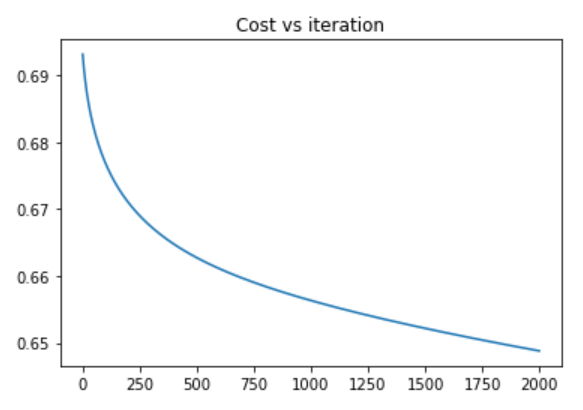<div>

Your train and test accuracy should be in the low 60%'s
* Plot your cost function
* Calculate and print your train and test accuracy (used command from previous assignment - circle)
* Show results of classifying a new downloaded image of cat or dog (maybe correct or incorrect, try several)


In [15]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
import time
 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

In [16]:
trained = np.load('cats_and_dogs.npz')

In [17]:
trained.files

['arr_0', 'arr_1', 'arr_2', 'arr_3']

In [18]:
X_train = trained['arr_0']
X_test = trained['arr_1']
Y_train = trained['arr_2']
Y_test = trained['arr_3']
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ",   X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (12288, 20000)
Y_train shape:  (1, 20000)
X_test shape:  (12288, 5000)
Y_test shape:  (1, 5000)


In [19]:
X_train = X_train/255
X_test = X_test/255
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [20]:
nx = X_train.shape[0]
m = X_train.shape[1]
print('nx = ',nx, 'm = ' ,m)

nx =  12288 m =  20000


cost after 0 epochs: 0.693147
cost after 100 epochs: 0.681955
cost after 200 epochs: 0.676859
cost after 300 epochs: 0.673493
cost after 400 epochs: 0.670991
cost after 500 epochs: 0.669004
cost after 600 epochs: 0.667361
cost after 700 epochs: 0.665964
cost after 800 epochs: 0.664752
cost after 900 epochs: 0.663683
cost after 1000 epochs: 0.662727
cost after 1100 epochs: 0.661862
cost after 1200 epochs: 0.661071
cost after 1300 epochs: 0.660343
cost after 1400 epochs: 0.659665
cost after 1500 epochs: 0.659031
cost after 1600 epochs: 0.658434
cost after 1700 epochs: 0.657869
cost after 1800 epochs: 0.657332
cost after 1900 epochs: 0.656818
Accuracy:  61.114999999999995


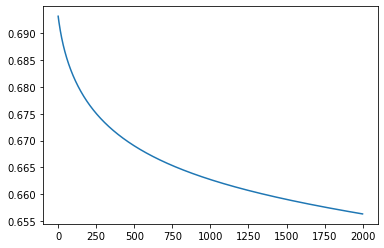

In [21]:
epochs = 2000
lr = 0.001
dim = nx
b = 0
X = X_train
Y = Y_train
cost = np.zeros((epochs,1))
w = np.zeros((dim, 1))


for i in range(epochs):
    A = sigmoid(np.dot(w.T,X) + b)
    cost[i] = (-1/m)*(np.sum(np.multiply(Y,np.log(A)) + np.multiply((1-Y),np.log(1-A))))
    dw = (1/m)*(np.dot(X, (A-Y).T))  
    db = (1/m)*(np.sum(A-Y))
    w = w - (lr*dw)
    b = b - (lr*db)
        
    if i % 100 == 0:
        print("cost after %i epochs: %f" %(i, cost[i]))


yhat_train = np.rint(A)
acc = np.mean(yhat_train == Y_train)*100
print("Accuracy: ", acc)
plt.plot(cost)

In [22]:
X = X_test
def predict(w, b, X):

    Y_predict = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        if A[0, i] <= 0.5:
            Y_predict[0, i] = 0
        else:
            Y_predict[0,i]  = 1

    return Y_predict
Y_predict = predict(w, b, X)
yhat_train = np.rint(Y_predict)
acc = np.mean(yhat_train == Y_train)*100
print("Accuracy: ", acc)

Accuracy:  50.415


In [23]:
Z = np.dot(w.T, X_test) + b
A = sigmoid(Z)
acc = np.mean(np.rint(A) == Y_test)
print ('The test accuracy rate is : ', acc * 100)

The test accuracy rate is :  59.86


In [24]:
ROWS = 64
COLS = 64
CHANNELS = 3
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

Prediction: DOG with probability [[53.69889565]]%


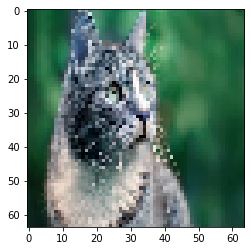

In [25]:
# After successsful learn, with the parameters W and b, download any image of cat or dog and test your classifier using code below:
file = "finalCat2.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = np.dot(w.T, X_img) + b
A = sigmoid(Z)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)